<h1>EP2 MODELAGEM</h1>

<h5>Nomes:</h5>

- Lucas Irineu Rebouças Guimarães, 11221713
- Luciano Rodrigues Saraiva Leão, 11221817



Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import pandas as pd
import math
!pip install pynamical
from pynamical import logistic_map, simulate, bifurcation_plot
from random import seed
from random import random


<h2> Modelo Dinâmico do COVID-19 <h2>

O modelo dinâmico do covid-19 pode ser descrito pelo modelo matemático $\frac{dN}{dt}= \alpha \left( 1 - \frac{N}{\eta t^2}\right)N - \left( \frac{2\lambda t^2-1}{t} - \frac{\lambda t_0^2}{t}e^{-\lambda (t-t_0)^2} \right)$, sendo que: 

\\
$\alpha>0$é o fator de crescimento

$t_0$ é o tempo inicial que depende das medidas de restrição

$\lambda = \sigma ^{-1}$

$\eta = \frac{2A}{t_0}$, onde A é um parâmetro que depende do vírus e das medidas de restrição



<h2> Ilha isolada <h2>

Fazendo a simulação do modelo dinâmico do covid-19 para o caso em que existe apenas uma ilha isolada, se obtem o gráfico abaixo:

In [ ]:
def novodN(N, t):
    return alpha * ( 1 - N/(neta * t * t)) * N + (1/t - 2 * Lambda  * t + ((t0 * t0)/t) * Lambda * math.exp(- Lambda * (t - t0) * (t - t0) ) )* N


def novoN(N, dN, deltaT):
    return N + dN * deltaT


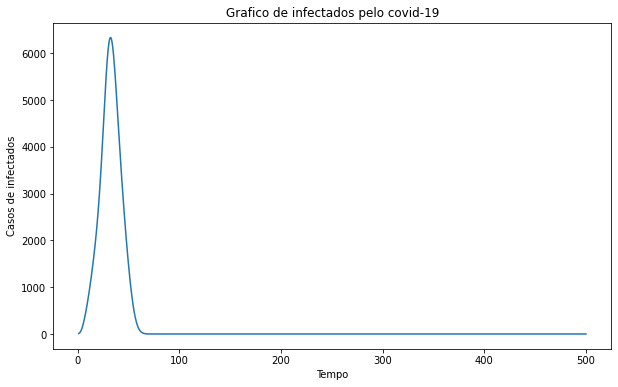

In [ ]:
alpha = 1.3
t0 = 30.0   #em dias  
Lambda = 0.014
A = 150.0
neta = 2*A/t0

deltaT = 0.10 

N = 10
dN = 0.0
t = 1.0
tf=200

valores1=[]
valores2=[]
while t < tf:
    valores1.append(N)
    valores2.append(t)
    dN=novodN(N,t)
    N=novoN(N,dN,deltaT)
    t += deltaT


plt.rcParams['figure.figsize']={10, 6}
plt.plot(valores2, valores1)
plt.title('Grafico de infectados pelo covid-19')
plt.xlabel('Tempo')
plt.ylabel('Casos de infectados')
plt.show()
   

<h4>Cinco ilhas diferentes<h4>



Agora, fazendo a comparação entre cinco ilhas diferentes, é possível mostrar como diferentes valores resultam em uma diferença drastica de numero de infectados. Fica claro que medidas de restrição conseguem diminuir o numero total de casos de maneira significativa, de modo que tanto o numero de casos quanto o periodo de crise com muitos pacientes infectados possam diminuir.

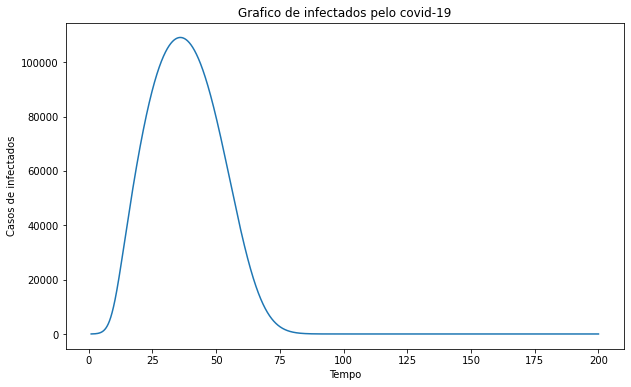

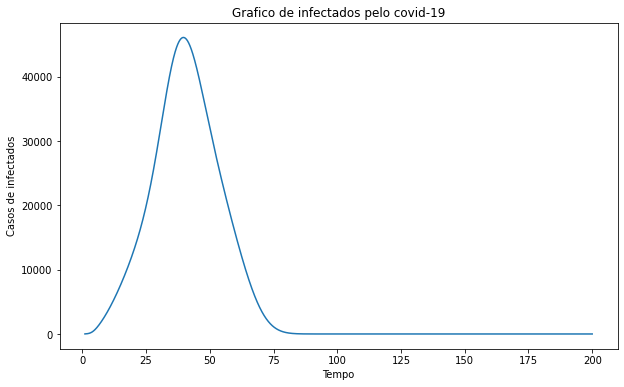

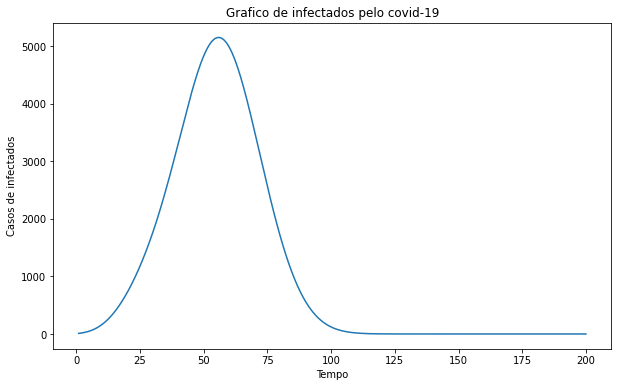

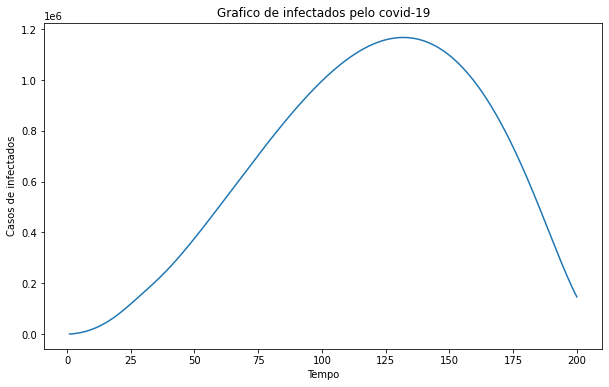

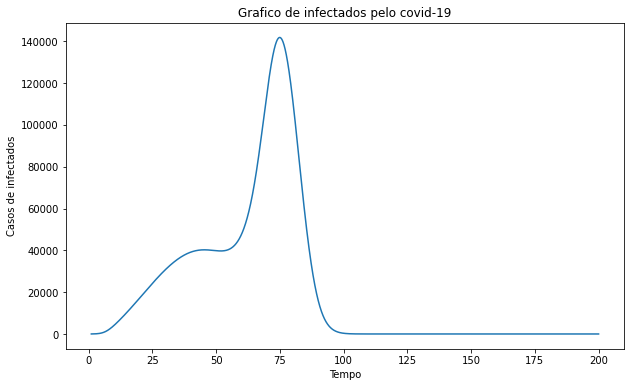

In [ ]:

i = 0

seed(3232)

valores = [[],[],[],[],[]]

while i < 5:
  alpha = 6*random()
  t0 = 200.0*random()   #em dias  
  Lambda = 0.01 * random()
  A = 5000 * random()
  neta = 2*A/t0

  deltaT = 0.01

  N = 10
  dN = 0.0
  t = 1.0
  tf=200

  valores[i] = []
  valores2 = []
  while t < tf:
      dN=novodN(N,t)
      N=novoN(N,dN,deltaT)
      #valores1.append(novodN(N,t))
      valores[i].append(N)
      valores2.append(t)
      t += deltaT

  plt.rcParams['figure.figsize']={10, 6}
  plt.plot(valores2, valores[i])
  plt.title('Grafico de infectados pelo covid-19')
  plt.xlabel('Tempo')
  plt.ylabel('Casos de infectados')
  plt.show()
  i += 1



In [ ]:
i = 0
while i < 5:
  j = i+1
  while j < 5:
    plt.rcParams['figure.figsize']={10, 6}
    plt.plot(valores[i], valores[j])
    plt.title('Grafico de infectados pelo covid-19')
    plt.xlabel('Casos de infectados na  ilha')
    plt.ylabel('Casos de infectados na  ilha ')
    plt.show()
    j += 1
  i += 1

<h2>Modelo COVID-19 : primeira aproximação real<h2>

A segunda aproximação escolhida foi o da primeira aproximação real, que pode ser descrito pelo modelo matematico $\frac{dN}{dt}=\alpha N \left( 1- \left( \frac{N}{K(t)}\right)^v \right)$, sendo que:

$\alpha >0$ é o fator de crescimento

$K >0$ é uma função que modela a capacidade de carregamento, que é uma função do tempo

$v >0$ é uma constante que afeta o comportamento assintótico do crescimento

<h4>Ilha isolada<h4>

Fazendo a simulação do modelo da primeira aproximação real do covid-19 para um lugar isolado se obtém o grafico a seguir: 

In [ ]:
populacao = 100000

def K(t):
  return populacao

def novodN2(N, t, v):
    return alpha * N * (1 - (N/K(t))^v)


def novoN2(N, dN, deltaT):
    return N + dN * deltaT

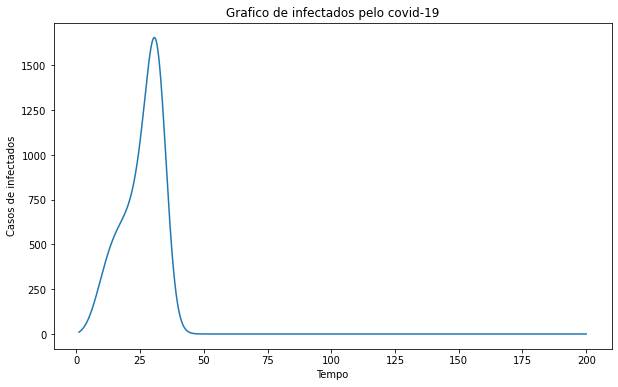

In [ ]:
alpha = 0.5
populacao = 100000


deltaT = 0.10 

N = 10
dN = 0.0
t = 1.0
tf=200

outros_valores1=[]
outros_valores2=[]
while t < tf:
    outros_valores1.append(N)
    outros_valores2.append(t)
    dN=novodN(N,t)
    N=novoN(N,dN,deltaT)
    t += deltaT


plt.rcParams['figure.figsize']={10, 6}
plt.plot(outros_valores2, outros_valores1)
plt.title('Grafico de infectados pelo covid-19')
plt.xlabel('Tempo')
plt.ylabel('Casos de infectados')
plt.show()

<h4>Cinco ilhas diferentes<h4>

Neste caso, comparando como seria o espalhamento do covid-19, pode-se ver como diferentes valores de fator de cresciento e de população podem mudar radicalmente o numero de infectados, quanto tempo a crise dura na ilha e até quantas vezes a crise se agrava

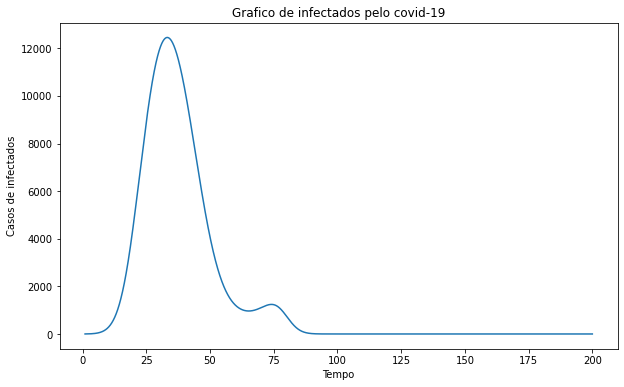

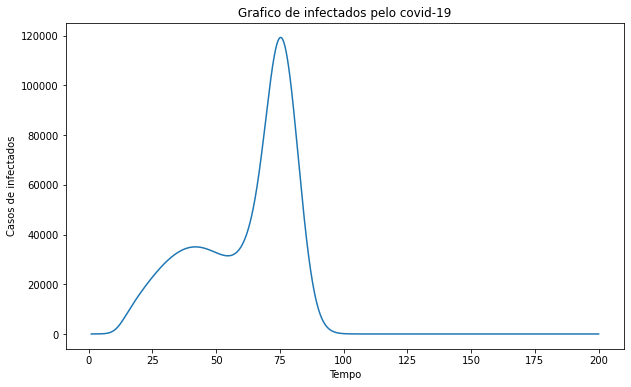

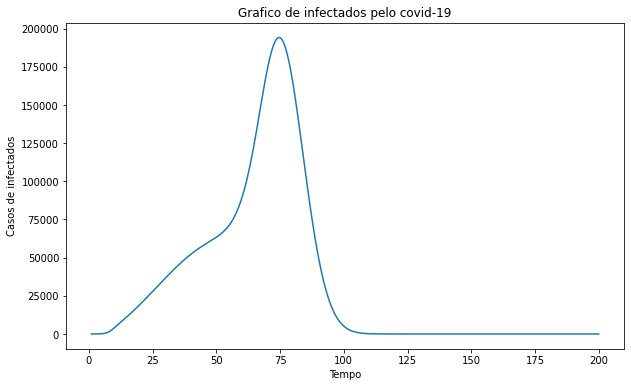

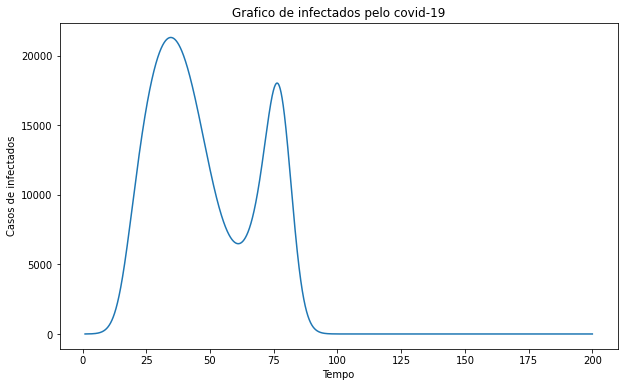

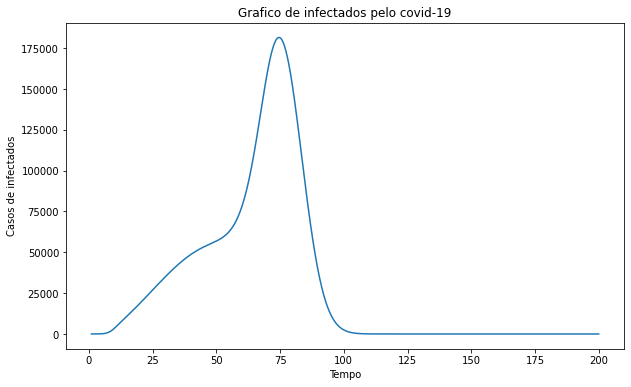

In [ ]:
i = 0

seed(213123)

outros_valores = [[],[],[],[],[]]

while i < 5:
  alpha = random()
  populacao = 100000*random()

  deltaT = 0.01

  N = 1
  dN = 0.0
  t = 1.0
  tf=200

  outros_valores[i] = []
  outros_valores2 = []
  while t < tf:
      dN=novodN(N,t)
      N=novoN(N,dN,deltaT)
      #valores1.append(novodN(N,t))
      outros_valores[i].append(N)
      outros_valores2.append(t)
      t += deltaT

  plt.rcParams['figure.figsize']={10, 6}
  plt.plot(outros_valores2, outros_valores[i])
  plt.title('Grafico de infectados pelo covid-19')
  plt.xlabel('Tempo')
  plt.ylabel('Casos de infectados')
  plt.show()
  i += 1



In [ ]:
i = 0
while i < 5:
  j = i+1
  while j < 5:
    plt.rcParams['figure.figsize']={10, 6}
    plt.plot(outros_valores[i], outros_valores[j])
    plt.title('Grafico de infectados pelo covid-19')
    plt.xlabel('Casos de infectados na ilha ')
    plt.ylabel('Casos de infectados na ilha ')
    plt.show()
    j += 1
  i += 1

<h2>Comparação entre os modelos<h2>

Ao comparar os dois modelos, pode-se ver que o modelo dinâmico do covid-19 é mais consistente do que a primeira aproximação real do modelo covid-19. Isso fica mais explicito quando se observa os gráficos para 5 ilhas, pois as variações nos valores não tem tanta interferencia nos gráficos, o que faz sentido, já que o comportamento do vírus é o mesmo, as mudanças são apenas as medidas de prevenção que cada governo utiliza.

Na pratica, as medidas de prevenção foram feitas com o intuito de diminuir o numero de infectados e achatar a curva, ou seja, diminuir o tamanho do pico de infectados e prolongar o período de casos, para não sobrecarregar os hospitais. 

Sabendo disso, observando os casos para 5 ilhas do modelo dinamico, pode-se ver como a diferença entre as ilhas é justamente o que se foi esperado na pratica: o tamanho do pico de infectados e o período em que existem varios pacientes infectados, evidenciando como o modelo é preciso e está a par com a realidade.

Por outro lado, o caso das 5 ilhas da primeira aproximação real do covid-19 mostram graficos mais distintos entre as ilhas, tendo até uma ilha com dois picos de infectados, o que não é esperado. 

Entretanto, mesmo com essas considerações, ainda é preciso dizer que o quanto a mudança nos parametros afeta a formula não quer dizer tudo, pois pode ser que as variações nos dados simulados sejam muito grandes (por exemplo, a população na primeira aproximação real é um numero entre 1 e 100000, mas na vida real a diferença entre as populações pode não ser tão grande), o que pode ser uma das justificativas para a diferença entre os dados. Provavelmente com os valores reais dos parametros e variações menores haja uma diferença nos dados, mas isto é algo que só pode ser estipulado, já que não é possível o acesso aos dados reais. 

Ou seja, a partir das simulações feitas, o modelo dinâmico se mostrou bem mais preciso e consistente do que a primeira aproximação real, mas vale ressaltar que é possível que com os dados reais isso não seja verdade, pois obviamente não se tem o acesso aos dados reais da pandemia, já que ela não acabou ainda, e também talvez a precisão e consistencia mude para uma variação pequena com os parametros reais.